# Feature Extraction and Image Processing
Mark S. Nixon & Alberto S. Aguado http://www.southampton.ac.uk/~msn/book/
### Chapter 8: *EllipticFourierDescriptors*
Compute the elliptic Fourier descriptors of a shape in an image 
***  

### Setup modules

In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname("__file__"), "../../Modules"))

# Module functions
from ImageUtilities import createImageF, createVectorF
from ImageRegionsUtilities import findLongestCentredSegmentinImage, plotShapeinImage, shapeMaxMin
from PlotUtilities import plotHistogram, plotCurve 

# Math and iteration
from math import pi, sqrt, sin, cos
from timeit import itertools

### Parameters:
    pathToDir = Input image directory
    imageName = Input image name
    gaussianKernelSize = Gaussian kernel size. Filter noise
    sobelKernelSize = Sobel kernel size. Edge detection
    upperT = Upper threshold
    lowerT = Lower threshold
    numDescriptors = Number of descriptors

In [2]:
pathToDir = os.path.join(os.path.dirname("__file__"), "../../Images/Chapter8/Input/")
imageName = "f14r.png"
gaussianKernelSize = 5
sobelKernelSize = 3
upperT = 0.3
lowerT = 0.05
numDescriptors = 20

### Obtain a shape from the input image and show

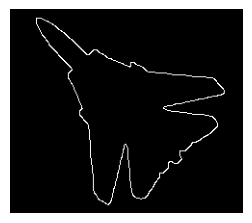

In [3]:
centre, shape, width, height = findLongestCentredSegmentinImage(pathToDir + imageName,   \
                                                gaussianKernelSize, sobelKernelSize, upperT, lowerT)
plotShapeinImage(shape, centre, width, height, figureSize = 3)

#### Add one coefficient to include the shape position 

In [4]:
numEdges = len(shape[0])
if numDescriptors == 0:  numDescriptors = 1 + int(numEdges /2)
else:                    numDescriptors += 1

### Display functions for x and y with domain values form 0 to 2p

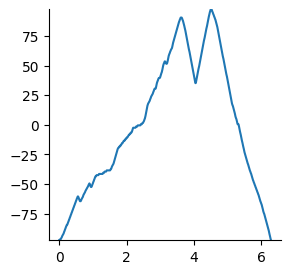

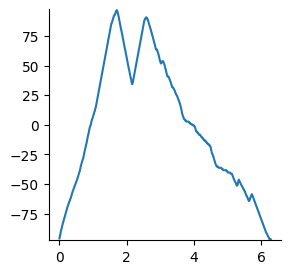

In [5]:
x, y = shape[1,:], shape[0,:] 
maxVal, minVal = shapeMaxMin(shape)
plotCurve(x, rangeY = [minVal, maxVal], rangeX = [0, 2.0*pi])
plotCurve(y, rangeY = [minVal, maxVal], rangeX = [0, 2.0*pi])

### Compute coefficients. The vector a contains ax,ay and b bx,by

In [6]:
t = 2.0 * pi / numEdges
a = createImageF(numDescriptors, 2)
b = createImageF(numDescriptors, 2)
for k in range(1, numDescriptors):
    for p in range(0, numEdges):
        a[0, k] += x[p] * cos(k*t*p)
        a[1, k] += y[p] * cos(k*t*p)
        b[0, k] += x[p] * sin(k*t*p)
        b[1, k] += y[p] * sin(k*t*p)

for k in range(1, numDescriptors):     
    a[0, k] *= (2.0/numEdges)
    a[1, k] *= (2.0/numEdges)
    b[0, k] *= (2.0/numEdges)
    b[1, k] *= (2.0/numEdges)

### Compute descriptors

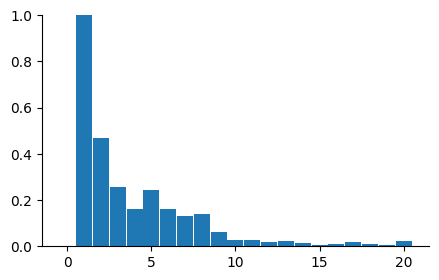

In [9]:
normA = a[0, 1]*a[0, 1] + a[1, 1]*a[1, 1]
normB = b[0, 1]*b[0, 1] + b[1, 1]*b[1, 1]
descriptors = createVectorF(numDescriptors)
for k in range(0, numDescriptors):
    descriptors[k] = sqrt( (a[0, k]*a[0, k] + a[1, k]*a[1, k])/normA) + \
                     sqrt( (b[0, k]*b[0, k] + b[1, k]*b[1, k])/normB)  
plotHistogram(descriptors, [0, 1], .95)

### Draw shape from coefficients

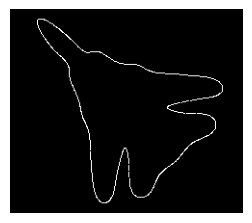

In [8]:
shapeReconst = createImageF(numEdges, 2)
for k in range(1, numDescriptors):
    for p in range(0, numEdges):
        shapeReconst[0, p] += a[1,k] * cos(k*t*p) + b[1,k] * sin(k*t*p)
        shapeReconst[1, p] += a[0,k] * cos(k*t*p) + b[0,k] * sin(k*t*p)
plotShapeinImage(shapeReconst, centre, width, height, figureSize = 3)